In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Create empty list to store DataFrames
dfs = []

# Loop through numbers 1 to 50 and read CSV files into DataFrames
for i in range(1, 51):
    filename = f'sub{i}_sentiment.csv'
    df = pd.read_csv(filename)
    dfs.append(df)

# Assign DataFrames to variables df1 to df50
for i, df in enumerate(dfs, start=1):
    globals()[f'df{i}'] = df


In [3]:
df34.head()

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,enterdate,entereddateutc,lastmodifieddate,speffectivedate,sptodate,gvkey,TICKER,Sentiment
0,1832724732,99803114,"Couchbase, Inc.","Couchbase, Inc. Appoints Bill Carey as Chief A...",16,Executive/Board Changes - Other,1,Target,2023-04-10,2023-04-10,11APR2023:02:47:00.000000,10APR2023:22:47:00.000000,11APR2023:03:00:15.000000,NaN,39059.0,BASE,Neutral
1,1833794304,99803114,"Couchbase, Inc.","Couchbase, Inc., Annual General Meeting, Jun 0...",62,Annual General Meeting,1,Target,2023-04-19,2023-04-20,20APR2023:09:34:00.000000,20APR2023:05:34:00.000000,01JUN2023:00:00:00.000000,NaN,39059.0,BASE,Neutral
2,1833794414,99803114,"Couchbase, Inc.","Couchbase, Inc. - Shareholder/Analyst Call",50,Shareholder/Analyst Calls,1,Target,2023-04-19,2023-04-20,20APR2023:09:03:00.000000,20APR2023:05:03:00.000000,01JUN2023:00:00:00.000000,NaN,39059.0,BASE,Neutral
3,1837662417,99803114,"Couchbase, Inc.","Corp Agency, Big Data & AI Paris, Sep 25, 2023...",149,Conferences,11,Sponsor,2023-05-12,2023-08-26,26AUG2023:13:48:00.000000,26AUG2023:09:51:00.000000,25SEP2023:00:00:00.000000,NaN,39059.0,BASE,Neutral
4,1837961233,99803114,"Couchbase, Inc.","Couchbase, Inc., Q1 2024 Earnings Call, Jun 06...",48,Earnings Calls,1,Target,2023-05-17,2023-05-17,17MAY2023:13:43:00.000000,17MAY2023:09:43:00.000000,06JUN2023:00:00:00.000000,NaN,39059.0,BASE,Neutral.


In [4]:
combined_df = pd.concat(dfs, ignore_index=True)

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230934 entries, 0 to 230933
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   keydevid                  230934 non-null  int64  
 1   companyid                 230934 non-null  int64  
 2   companyname               230934 non-null  object 
 3   headline                  230934 non-null  object 
 4   keydeveventtypeid         230934 non-null  int64  
 5   eventtype                 230934 non-null  object 
 6   keydevtoobjectroletypeid  230934 non-null  int64  
 7   objectroletype            230934 non-null  object 
 8   announcedate              230934 non-null  object 
 9   enterdate                 230934 non-null  object 
 10  entereddateutc            230934 non-null  object 
 11  lastmodifieddate          230934 non-null  object 
 12  speffectivedate           230934 non-null  object 
 13  sptodate                  0 non-null       f

In [6]:
combined_df['Sentiment'].unique()

array(['"\n\nNeutral', 'Neutral', 'Positive', ..., '09:30 AM\nNeutral',
       '")\nNeutral',
       'Thank you for your interest in our new products at Natural Products Expo West.\n\nPositive'],
      dtype=object)

In [7]:
# Define a function to categorize the sentiment
def categorize_sentiment(sentiment):
    if isinstance(sentiment, str):
        sentiment = sentiment.lower()  
        if 'positive' in sentiment:
            return 'positive'
        elif 'negative' in sentiment:
            return 'negative'
        else:
            return 'neutral'
    else:
        return np.nan  

# Apply the function to each value in the Sentiment column
combined_df['Sentiment'] = combined_df['Sentiment'].apply(categorize_sentiment)

# Display unique values in the cleaned Sentiment column
unique_sentiments_cleaned = combined_df['Sentiment'].unique()
print(unique_sentiments_cleaned)

['neutral' 'positive' 'negative' nan]


In [8]:
# Drop observations with null values in the Sentiment column
combined_df.dropna(subset=['Sentiment'], inplace=True)

# Verify that null values have been dropped
print(combined_df['Sentiment'].isnull().sum())

0


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230920 entries, 0 to 230933
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   keydevid                  230920 non-null  int64  
 1   companyid                 230920 non-null  int64  
 2   companyname               230920 non-null  object 
 3   headline                  230920 non-null  object 
 4   keydeveventtypeid         230920 non-null  int64  
 5   eventtype                 230920 non-null  object 
 6   keydevtoobjectroletypeid  230920 non-null  int64  
 7   objectroletype            230920 non-null  object 
 8   announcedate              230920 non-null  object 
 9   enterdate                 230920 non-null  object 
 10  entereddateutc            230920 non-null  object 
 11  lastmodifieddate          230920 non-null  object 
 12  speffectivedate           230920 non-null  object 
 13  sptodate                  0 non-null       f

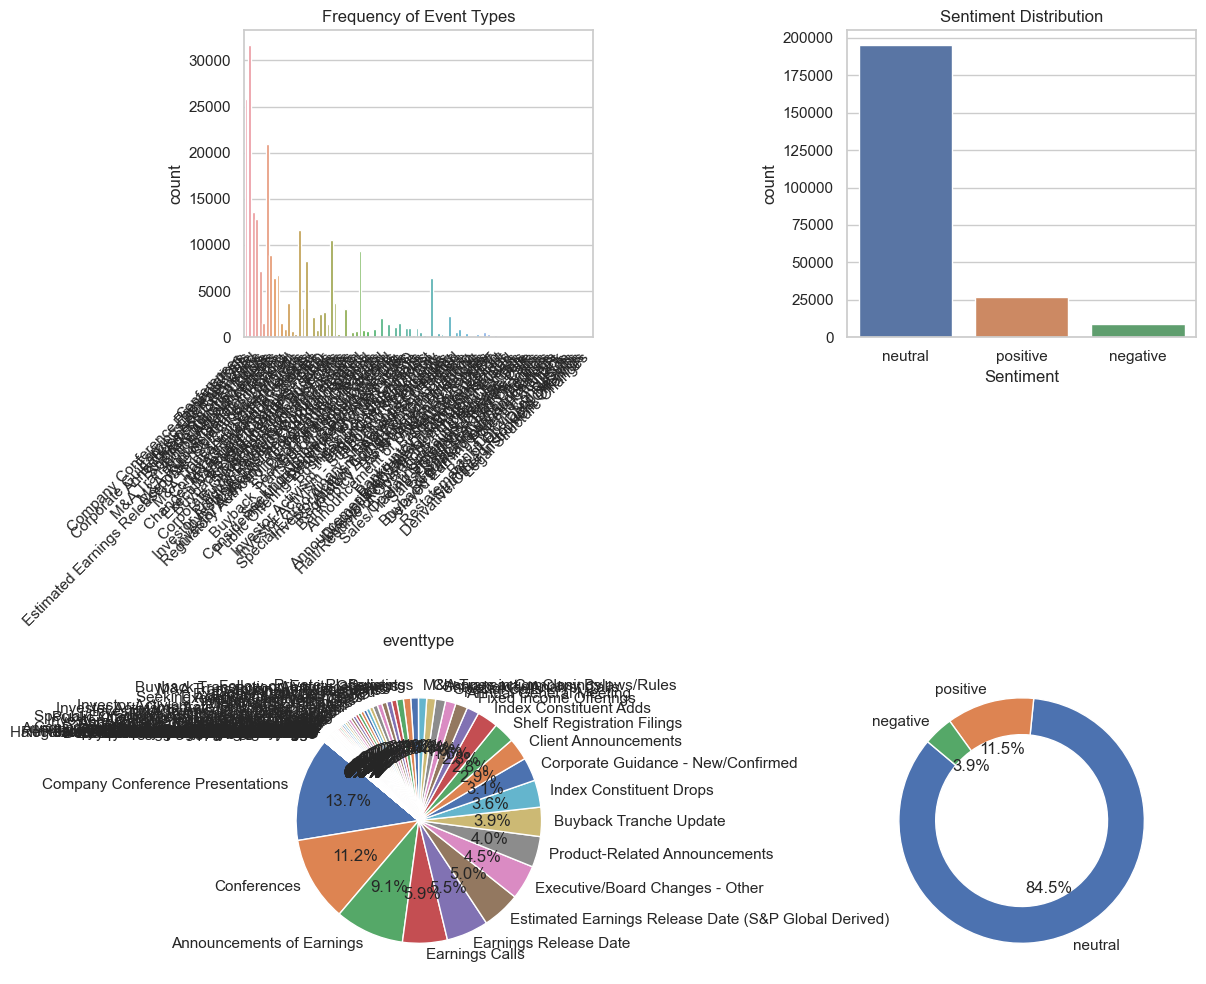

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for eventtype
sns.countplot(x='eventtype', data=combined_df, ax=axes[0, 0])
axes[0, 0].set_title('Frequency of Event Types')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Plot for Sentiment
sns.countplot(x='Sentiment', data=combined_df, ax=axes[0, 1])
axes[0, 1].set_title('Sentiment Distribution')

# Pie chart for eventtype
combined_df['eventtype'].value_counts().plot.pie(ax=axes[1, 0], autopct='%1.1f%%', startangle=140)
axes[1, 0].set_ylabel('')  

# Donut chart for Sentiment
combined_df['Sentiment'].value_counts().plot.pie(ax=axes[1, 1], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
axes[1, 1].set_ylabel('') 

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [11]:
# Convert 'entereddateutc' column to datetime with explicit format
combined_df['entereddateutc'] = pd.to_datetime(combined_df['entereddateutc'], format='%d%b%Y:%H:%M:%S.%f')

# Define market hours
market_open = pd.Timestamp('09:30:00').time()
market_close = pd.Timestamp('16:30:00').time()

# Function to categorize time
def categorize_time(time):
    if time.time() < market_open:
        return 'pre_market_hours'
    elif market_open <= time.time() <= market_close:
        return 'market_hours'
    else:
        return 'post_market_hours'

# Apply the function to create the new column
combined_df['time_category'] = combined_df['entereddateutc'].apply(categorize_time)

# Display the first few rows to verify
print(combined_df[['entereddateutc', 'time_category']].head())


       entereddateutc     time_category
0 2023-01-14 02:01:00  pre_market_hours
1 2023-01-18 03:03:00  pre_market_hours
2 2023-01-18 02:25:00  pre_market_hours
3 2023-01-18 02:25:00  pre_market_hours
4 2023-01-17 12:29:00      market_hours


In [12]:
combined_df.head(10)

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,enterdate,entereddateutc,lastmodifieddate,speffectivedate,sptodate,gvkey,TICKER,Sentiment,time_category
0,1821738046,18671,Albemarle Corporation,"Loop Capital Markets LLC, Loop Capital Markets...",149,Conferences,8,Participant,2023-01-13,2023-01-13,2023-01-14 02:01:00,13MAR2023:03:06:00.000000,13MAR2023:06:29:36.000000,NaN,29751.0,ALB,neutral,pre_market_hours
1,1822140232,18671,Albemarle Corporation,Albemarle Corporation Presents at Internationa...,51,Company Conference Presentations,1,Target,2023-01-17,2023-01-17,2023-01-18 03:03:00,22FEB2023:02:03:00.000000,20MAR2023:06:15:14.000000,NaN,29751.0,ALB,neutral,pre_market_hours
2,1822119160,18671,Albemarle Corporation,"Cambridge EnerTech, Inc., International Batter...",149,Conferences,8,Participant,2023-01-17,2023-01-17,2023-01-18 02:25:00,01MAR2023:04:45:00.000000,20MAR2023:06:15:14.000000,NaN,29751.0,ALB,positive,pre_market_hours
3,1822119160,18671,Albemarle Corporation,"Cambridge EnerTech, Inc., International Batter...",149,Conferences,11,Sponsor,2023-01-17,2023-01-17,2023-01-18 02:25:00,01MAR2023:04:45:00.000000,20MAR2023:06:15:14.000000,NaN,29751.0,ALB,neutral,pre_market_hours
4,1822044577,18671,Albemarle Corporation,"Albemarle Corporation, Q4 2022 Earnings Call, ...",48,Earnings Calls,1,Target,2023-01-17,2023-01-17,2023-01-17 12:29:00,17JAN2023:07:29:00.000000,16FEB2023:11:41:43.000000,NaN,29751.0,ALB,neutral,market_hours
5,1822044620,18671,Albemarle Corporation,"Albemarle Corporation to Report Q4, 2022 Resul...",55,Earnings Release Date,1,Target,2023-01-17,2023-01-17,2023-01-17 12:27:00,17JAN2023:07:27:00.000000,15FEB2023:12:05:33.000000,NaN,29751.0,ALB,neutral,market_hours
6,1823109999,18671,Albemarle Corporation,Albemarle Corporation Provides Revenue Guidanc...,29,Corporate Guidance - New/Confirmed,1,Target,2023-01-23,2023-01-23,2023-01-24 04:19:00,23JAN2023:23:19:00.000000,24JAN2023:11:56:00.000000,NaN,29751.0,ALB,neutral,pre_market_hours
7,1823738444,18671,Albemarle Corporation,Albemarle Corporation Announces Launch of Ketj...,31,Business Expansions,1,Target,2023-01-30,2023-01-30,2023-01-31 03:17:00,30JAN2023:22:17:00.000000,31JAN2023:11:51:00.000000,NaN,29751.0,ALB,neutral,pre_market_hours
8,1824926303,18671,Albemarle Corporation,Albemarle Corporation Presents at NAATBatt Ann...,51,Company Conference Presentations,1,Target,2023-02-07,2023-02-07,2023-02-07 20:03:00,07FEB2023:15:03:00.000000,22FEB2023:11:28:20.000000,NaN,29751.0,ALB,neutral,post_market_hours
9,1825062652,18671,Albemarle Corporation,Albemarle Corporation Presents at BMO 32nd Ann...,51,Company Conference Presentations,1,Target,2023-02-08,2023-02-08,2023-02-08 17:03:00,23FEB2023:03:03:00.000000,27FEB2023:10:45:17.000000,NaN,29751.0,ALB,neutral,post_market_hours


In [13]:
# Get the unique values in the 'companyid' column and calculate the length
unique_company_ids = combined_df['gvkey'].unique()
length = len(unique_company_ids)

# Print the length
print(length)

4008


In [14]:
# Assuming your DataFrame is named df
columns_to_drop = ['keydevid', 'keydevtoobjectroletypeid', 'announcedate', 'lastmodifieddate', 'speffectivedate', 'sptodate']
combined_df = combined_df.drop(columns=columns_to_drop)

In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230920 entries, 0 to 230933
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   companyid          230920 non-null  int64         
 1   companyname        230920 non-null  object        
 2   headline           230920 non-null  object        
 3   keydeveventtypeid  230920 non-null  int64         
 4   eventtype          230920 non-null  object        
 5   objectroletype     230920 non-null  object        
 6   enterdate          230920 non-null  object        
 7   entereddateutc     230920 non-null  datetime64[ns]
 8   gvkey              230920 non-null  float64       
 9   TICKER             230920 non-null  object        
 10  Sentiment          230920 non-null  object        
 11  time_category      230920 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 22.9+ MB


In [16]:
stock = pd.read_csv('Daily Stock Prices.csv')

C:\Users\joel3\AppData\Local\Temp\ipykernel_2148\2174934457.py:1: DtypeWarning: Columns (2,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  stock = pd.read_csv('Daily Stock Prices.csv')


In [17]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354421 entries, 0 to 2354420
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PERMNO  int64  
 1   date    object 
 2   SICCD   object 
 3   TICKER  object 
 4   COMNAM  object 
 5   HSICIG  float64
 6   BIDLO   float64
 7   ASKHI   float64
 8   PRC     float64
 9   VOL     float64
 10  RET     object 
 11  SHROUT  float64
 12  NUMTRD  float64
 13  RETX    object 
 14  sprtrn  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 269.4+ MB


In [18]:
stock.head()

,PERMNO,date,SICCD,TICKER,COMNAM,HSICIG,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,NUMTRD,RETX,sprtrn
0,10026,2023-01-03,2052,JJSF,J & J SNACK FOODS CORP,NaN,147.08000,151.92000,151.48000,89954.0,0.011823,19229.0,3627.0,0.011823,-0.004001
1,10026,2023-01-04,2052,JJSF,J & J SNACK FOODS CORP,NaN,150.24001,153.09000,151.22000,52980.0,-0.001716,19229.0,2367.0,-0.001716,0.007539
2,10026,2023-01-05,2052,JJSF,J & J SNACK FOODS CORP,NaN,148.68500,153.00000,149.60001,60472.0,-0.010713,19229.0,2510.0,-0.010713,-0.011646
3,10026,2023-01-06,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.85001,153.32001,152.64000,57034.0,0.020321,19229.0,5521.0,0.020321,0.022841
4,10026,2023-01-09,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.39999,152.49001,149.61000,63214.0,-0.019851,19229.0,3466.0,-0.019851,-0.000768


In [19]:
# Convert 'date' column in both dataframes to datetime if it's not already
combined_df['enterdate'] = pd.to_datetime(combined_df['enterdate'], format='%Y-%m-%d')
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d')

# Left join the datasets on 'TICKER' and 'date'
merged_df = pd.merge(combined_df, stock, how='left', left_on=['TICKER', 'enterdate'], right_on=['TICKER', 'date'])

# Drop the duplicate 'date' column from the right dataframe
merged_df.drop('date', axis=1, inplace=True)

# Display the merged dataframe
print(merged_df.head())

   companyid            companyname  \
0      18671  Albemarle Corporation   
1      18671  Albemarle Corporation   
2      18671  Albemarle Corporation   
3      18671  Albemarle Corporation   
4      18671  Albemarle Corporation   

                                            headline  keydeveventtypeid  \
0  Loop Capital Markets LLC, Loop Capital Markets...                149   
1  Albemarle Corporation Presents at Internationa...                 51   
2  Cambridge EnerTech, Inc., International Batter...                149   
3  Cambridge EnerTech, Inc., International Batter...                149   
4  Albemarle Corporation, Q4 2022 Earnings Call, ...                 48   

                          eventtype objectroletype  enterdate  \
0                       Conferences    Participant 2023-01-13   
1  Company Conference Presentations         Target 2023-01-17   
2                       Conferences    Participant 2023-01-17   
3                       Conferences        Sponsor 202

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231590 entries, 0 to 231589
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   companyid          231590 non-null  int64         
 1   companyname        231590 non-null  object        
 2   headline           231590 non-null  object        
 3   keydeveventtypeid  231590 non-null  int64         
 4   eventtype          231590 non-null  object        
 5   objectroletype     231590 non-null  object        
 6   enterdate          231590 non-null  datetime64[ns]
 7   entereddateutc     231590 non-null  datetime64[ns]
 8   gvkey              231590 non-null  float64       
 9   TICKER             231590 non-null  object        
 10  Sentiment          231590 non-null  object        
 11  time_category      231590 non-null  object        
 12  PERMNO             167687 non-null  float64       
 13  SICCD              167687 non-null  object  

In [21]:
# Create a new column indicating weekday or weekend
merged_df['day_type'] = merged_df['enterdate'].dt.dayofweek.map({0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'})
merged_df.head(5)

,companyid,companyname,headline,keydeveventtypeid,eventtype,objectroletype,enterdate,entereddateutc,gvkey,TICKER,...,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,NUMTRD,RETX,sprtrn,day_type
0,18671,Albemarle Corporation,"Loop Capital Markets LLC, Loop Capital Markets...",149,Conferences,Participant,2023-01-13,2023-01-14 02:01:00,29751.0,ALB,...,233.34000,242.32001,242.23000,1262866.0,-0.004029,117153.0,NaN,-0.004029,0.003997,Weekday
1,18671,Albemarle Corporation,Albemarle Corporation Presents at Internationa...,51,Company Conference Presentations,Target,2023-01-17,2023-01-18 03:03:00,29751.0,ALB,...,241.75999,245.42999,243.07001,1354386.0,0.003468,117153.0,NaN,0.003468,-0.002030,Weekday
2,18671,Albemarle Corporation,"Cambridge EnerTech, Inc., International Batter...",149,Conferences,Participant,2023-01-17,2023-01-18 02:25:00,29751.0,ALB,...,241.75999,245.42999,243.07001,1354386.0,0.003468,117153.0,NaN,0.003468,-0.002030,Weekday
3,18671,Albemarle Corporation,"Cambridge EnerTech, Inc., International Batter...",149,Conferences,Sponsor,2023-01-17,2023-01-18 02:25:00,29751.0,ALB,...,241.75999,245.42999,243.07001,1354386.0,0.003468,117153.0,NaN,0.003468,-0.002030,Weekday
4,18671,Albemarle Corporation,"Albemarle Corporation, Q4 2022 Earnings Call, ...",48,Earnings Calls,Target,2023-01-17,2023-01-17 12:29:00,29751.0,ALB,...,241.75999,245.42999,243.07001,1354386.0,0.003468,117153.0,NaN,0.003468,-0.002030,Weekday


In [22]:
# Save the merged dataframe as a CSV file
merged_df.to_csv('News Articles.csv', index=False)

In [23]:
# Create dummy variables for the 'Sentiment' column
sentiment_dummies = pd.get_dummies(combined_df['Sentiment'])

# Sum the dummy variables to get the count of each sentiment category
sentiment_counts = sentiment_dummies.sum()

# Create new columns in the DataFrame for each sentiment category
combined_df['positive'] = sentiment_dummies['positive']
combined_df['negative'] = sentiment_dummies['negative']
combined_df['total'] = sentiment_dummies.any(axis=1).astype(int)  # 1 if any sentiment value is present, 0 otherwise

# Fill NaN values with 0 in case some sentiment categories are missing
combined_df[['positive', 'negative', 'total']] = combined_df[['positive', 'negative', 'total']].fillna(0)

# Convert the values to integers
combined_df[['positive', 'negative', 'total']] = combined_df[['positive', 'negative', 'total']].astype(int)

# Print the updated DataFrame
print(combined_df)

         companyid            companyname  \
0            18671  Albemarle Corporation   
1            18671  Albemarle Corporation   
2            18671  Albemarle Corporation   
3            18671  Albemarle Corporation   
4            18671  Albemarle Corporation   
...            ...                    ...   
230929  1851034978     Liberty Live Group   
230930  1851034978     Liberty Live Group   
230931  1851034978     Liberty Live Group   
230932  1851034978     Liberty Live Group   
230933  1851034978     Liberty Live Group   

                                                 headline  keydeveventtypeid  \
0       Loop Capital Markets LLC, Loop Capital Markets...                149   
1       Albemarle Corporation Presents at Internationa...                 51   
2       Cambridge EnerTech, Inc., International Batter...                149   
3       Cambridge EnerTech, Inc., International Batter...                149   
4       Albemarle Corporation, Q4 2022 Earnings Call, ...  

In [24]:
# Group by 'enterdate' and 'TICKER' and aggregate the sum of 'positive', 'negative', and 'total'
grouped_df = combined_df.groupby(['enterdate', 'TICKER']).agg({'positive': 'sum', 'negative': 'sum', 'total': 'sum'}).reset_index()

# Print the first few rows of the grouped DataFrame
print(grouped_df.head())

   enterdate TICKER  positive  negative  total
0 2017-03-28   ZYNE         0         0      1
1 2017-07-13   QCOM         0         0      1
2 2017-11-02   KBAL         0         0      1
3 2018-06-18   SPPI         0         0      1
4 2019-03-11   SRGA         0         0      1


In [25]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150240 entries, 0 to 150239
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   enterdate  150240 non-null  datetime64[ns]
 1   TICKER     150240 non-null  object        
 2   positive   150240 non-null  int32         
 3   negative   150240 non-null  int32         
 4   total      150240 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 4.0+ MB


In [26]:
# Frequency table for the 'total' column
total_freq_table = grouped_df['total'].value_counts().reset_index()
total_freq_table.columns = ['Total', 'Frequency']

# Sort by the 'Total' column
total_freq_table = total_freq_table.sort_values(by='Total')

# Print the frequency table
print(total_freq_table)


    Total  Frequency
0       1     101063
1       2      35017
2       3       8531
3       4       2636
4       5       1001
5       6        641
6       7        341
7       8        185
10      9        109
11     10         95
8      11        141
12     12         83
9      13        114
13     14         63
17     15         30
15     16         34
14     17         53
18     18         23
16     19         31
19     20         10
21     21          7
20     22          9
27     23          2
22     24          5
23     25          3
25     26          2
24     27          2
28     28          1
32     29          1
26     31          2
34     37          1
31     40          1
29     41          1
30     42          1
33     57          1


In [27]:
# Frequency table for the 'total' column
total_freq_table1 = grouped_df['positive'].value_counts().reset_index()
total_freq_table1.columns = ['Positive', 'Frequency']

# Sort by the 'Total' column
total_freq_table1 = total_freq_table1.sort_values(by='Positive')

# Print the frequency table
print(total_freq_table1)

    Positive  Frequency
0          0     127266
1          1      21274
2          2       1094
3          3        206
4          4        122
5          5         85
6          6         51
8          7         36
7          8         37
9          9         21
10        10         15
11        11         12
12        12          7
13        13          6
16        14          2
14        15          3
15        16          2
17        55          1


In [28]:
# Frequency table for the 'total' column
total_freq_table2 = grouped_df['negative'].value_counts().reset_index()
total_freq_table2.columns = ['Negative', 'Frequency']

# Sort by the 'Total' column
total_freq_table2 = total_freq_table2.sort_values(by='Negative')

# Print the frequency table
print(total_freq_table2)


    Negative  Frequency
0          0     145029
1          1       4024
2          2        401
3          3        213
4          4        180
5          5        131
6          6         87
8          7         33
7          8         40
9          9         26
10        10         22
11        11         21
12        12         10
14        13          4
16        14          3
13        15          9
17        16          2
19        17          1
15        18          3
18        20          1


In [29]:
# Filter the "stocks_df" dataset to only include observations with TICKER present in "grouped_df"
filtered_stocks_df = stock[stock['TICKER'].isin(grouped_df['TICKER'])]

# Left join the two datasets on 'enterdate' and 'TICKER'
merged_df = pd.merge(filtered_stocks_df, grouped_df, how='left', left_on=['date', 'TICKER'], right_on=['enterdate', 'TICKER'])

# Fill null values in 'positive', 'negative', and 'total' columns with 0
merged_df[['positive', 'negative', 'total']] = merged_df[['positive', 'negative', 'total']].fillna(0)

# Print the first few rows of the merged dataset
print(merged_df.head())


   PERMNO       date SICCD TICKER                  COMNAM  HSICIG      BIDLO  \
0   10026 2023-01-03  2052   JJSF  J & J SNACK FOODS CORP     NaN  147.08000   
1   10026 2023-01-04  2052   JJSF  J & J SNACK FOODS CORP     NaN  150.24001   
2   10026 2023-01-05  2052   JJSF  J & J SNACK FOODS CORP     NaN  148.68500   
3   10026 2023-01-06  2052   JJSF  J & J SNACK FOODS CORP     NaN  149.85001   
4   10026 2023-01-09  2052   JJSF  J & J SNACK FOODS CORP     NaN  149.39999   

       ASKHI        PRC      VOL       RET   SHROUT  NUMTRD      RETX  \
0  151.92000  151.48000  89954.0  0.011823  19229.0  3627.0  0.011823   
1  153.09000  151.22000  52980.0 -0.001716  19229.0  2367.0 -0.001716   
2  153.00000  149.60001  60472.0 -0.010713  19229.0  2510.0 -0.010713   
3  153.32001  152.64000  57034.0  0.020321  19229.0  5521.0  0.020321   
4  152.49001  149.61000  63214.0 -0.019851  19229.0  3466.0 -0.019851   

     sprtrn  enterdate  positive  negative  total  
0 -0.004001 2023-01-03      

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952998 entries, 0 to 952997
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   PERMNO     952998 non-null  int64         
 1   date       952998 non-null  datetime64[ns]
 2   SICCD      952998 non-null  object        
 3   TICKER     952998 non-null  object        
 4   COMNAM     952998 non-null  object        
 5   HSICIG     108478 non-null  float64       
 6   BIDLO      952785 non-null  float64       
 7   ASKHI      952785 non-null  float64       
 8   PRC        952785 non-null  float64       
 9   VOL        952785 non-null  float64       
 10  RET        952785 non-null  object        
 11  SHROUT     952863 non-null  float64       
 12  NUMTRD     602839 non-null  float64       
 13  RETX       952785 non-null  object        
 14  sprtrn     952998 non-null  float64       
 15  enterdate  112290 non-null  datetime64[ns]
 16  positive   952998 no

In [31]:
# Frequency table for the 'total' column
total_freq_table = merged_df['total'].value_counts().reset_index()
total_freq_table.columns = ['Total', 'Frequency']

# Sort by the 'Total' column
total_freq_table = total_freq_table.sort_values(by='Total')

# Print the frequency table
print(total_freq_table)


    Total  Frequency
0     0.0     840708
1     1.0      74625
2     2.0      27371
3     3.0       6958
4     4.0       1924
5     5.0        659
6     6.0        267
7     7.0        176
8     8.0         92
9     9.0         54
10   10.0         39
12   11.0         16
11   12.0         19
14   13.0         15
13   14.0         15
15   15.0         14
16   16.0         10
17   17.0          7
18   18.0          5
24   19.0          2
20   20.0          4
19   21.0          4
28   22.0          1
21   24.0          3
22   25.0          2
31   26.0          1
23   27.0          2
29   28.0          1
26   31.0          1
27   37.0          1
25   42.0          1
30   57.0          1


In [32]:
# Frequency table for the 'total' column
total_freq_table = merged_df['positive'].value_counts().reset_index()
total_freq_table.columns = ['Total', 'Frequency']

# Sort by the 'Total' column
total_freq_table = total_freq_table.sort_values(by='Total')

# Print the frequency table
print(total_freq_table)


    Total  Frequency
0     0.0     936316
1     1.0      15895
2     2.0        690
3     3.0         66
4     4.0         16
7     5.0          3
5     6.0          4
6     7.0          3
9     8.0          1
8    10.0          1
11   13.0          1
10   16.0          1
12   55.0          1


In [34]:
# Calculate market capitalization
merged_df['market_cap'] = merged_df['PRC'] * merged_df['SHROUT']

# Group by TICKER and calculate average market capitalization
average_market_cap = merged_df.groupby('TICKER')['market_cap'].mean()

# Find the 1000 Tickers with the largest market capitalization
top_1000_tickers = average_market_cap.nlargest(2000).index

# Filter merged_df to include observations for the top 1000 tickers
filtered_merged_df = merged_df[merged_df['TICKER'].isin(top_1000_tickers)]

# Print the first few rows of the filtered DataFrame
print(filtered_merged_df.head())


   PERMNO       date SICCD TICKER                  COMNAM  HSICIG      BIDLO  \
0   10026 2023-01-03  2052   JJSF  J & J SNACK FOODS CORP     NaN  147.08000   
1   10026 2023-01-04  2052   JJSF  J & J SNACK FOODS CORP     NaN  150.24001   
2   10026 2023-01-05  2052   JJSF  J & J SNACK FOODS CORP     NaN  148.68500   
3   10026 2023-01-06  2052   JJSF  J & J SNACK FOODS CORP     NaN  149.85001   
4   10026 2023-01-09  2052   JJSF  J & J SNACK FOODS CORP     NaN  149.39999   

       ASKHI        PRC      VOL       RET   SHROUT  NUMTRD      RETX  \
0  151.92000  151.48000  89954.0  0.011823  19229.0  3627.0  0.011823   
1  153.09000  151.22000  52980.0 -0.001716  19229.0  2367.0 -0.001716   
2  153.00000  149.60001  60472.0 -0.010713  19229.0  2510.0 -0.010713   
3  153.32001  152.64000  57034.0  0.020321  19229.0  5521.0  0.020321   
4  152.49001  149.61000  63214.0 -0.019851  19229.0  3466.0 -0.019851   

     sprtrn  enterdate  positive  negative  total    market_cap  
0 -0.004001 20

In [35]:
# Save the merged dataframe as a CSV file
filtered_merged_df.to_csv('Russell2000 Daily Returns.csv', index=False)

In [36]:
filtered_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490389 entries, 0 to 952997
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   PERMNO      490389 non-null  int64         
 1   date        490389 non-null  datetime64[ns]
 2   SICCD       490389 non-null  object        
 3   TICKER      490389 non-null  object        
 4   COMNAM      490389 non-null  object        
 5   HSICIG      42867 non-null   float64       
 6   BIDLO       490317 non-null  float64       
 7   ASKHI       490317 non-null  float64       
 8   PRC         490317 non-null  float64       
 9   VOL         490317 non-null  float64       
 10  RET         490317 non-null  object        
 11  SHROUT      490318 non-null  float64       
 12  NUMTRD      231030 non-null  float64       
 13  RETX        490317 non-null  object        
 14  sprtrn      490389 non-null  float64       
 15  enterdate   66716 non-null   datetime64[ns]
 16  po